Applying a relation
=====================

Optimization terminated successfully.
         Current function value: 0.006861
         Iterations: 167
         Function evaluations: 291
Fit result:  [-0.68455253 10.11295912 20.15560727  1.00015156]
------------------- Parameter summary --------------------
      A =      1.01541, free: T, restricted: F, related: T
     mu =       10.113, free: T, restricted: F, related: F
    sig =      20.1556, free: T, restricted: F, related: F
    off =      1.00015, free: T, restricted: F, related: F
    lin =            0, free: F, restricted: F, related: F
----------------------------------------------------------


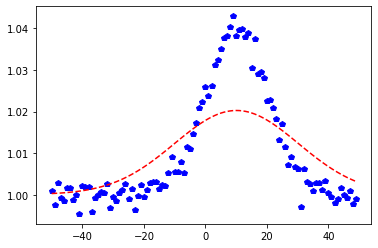

In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pylab as plt
from PyAstronomy import funcFit2 as fuf2
import scipy.optimize as sco

np.random.seed(1234)

# Creating a Gaussian with some noise
# Choose some parameters...
gPar = {"A":1.0, "sig":10.0, "mu":10.0, "off":1.0, "lin":0.0}
# Calculate profile
x = np.arange(100) - 50.0
y = gPar["off"] + gPar["A"] / np.sqrt(2*np.pi*gPar["sig"]**2) \
    * np.exp(-(x-gPar["mu"])**2/(2*gPar["sig"]**2))
# Add some noise...
y += np.random.normal(0.0, 0.002, x.size)
# ...and save the error bars
yerr = np.ones_like(x)*0.002

# Create a model object
gf = fuf2.GaussFit()

# Set guess values for the parameters
gf.assignValues({"A":3, "sig":3.77, "off":0.96, "mu":9.5})

# 'Thaw' those (the order is irrelevant)
gf.thaw(["mu", "sig", "off", "A"])

def relat(sig, off):
    """ Combine values of sig and off """
    return 0.1*sig - off

# 'A' is a function of 'sig' and 'off' (A=f(sig,off)).
# First parameter is the dependent variable, second is a list of
# the independent variables, and the third one is theactual
# functional relation.
gf.relate("A", ["sig", "off"], func=relat)

fr = sco.fmin(gf.chisqr, gf.freeParamVals(), args=(x,y))
print("Fit result: ", fr)
# Set the parameter values to best-fit
gf.setFreeParamVals(fr)

gf.parameterSummary()

# Let us see what we have done...
plt.plot(x, y, 'bp')
plt.plot(x, gf.evaluate(x), 'r--')
plt.show()